In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# The imdb reviews data set will be used to build the classifier and will be tested on the other two data sets loaded below
imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)#, delimiter= '\t', header=None)
imdb.columns = ['review', 'score']

amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)#, delimiter= '\t', header=None)
amazon.columns = ['review', 'score']

yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)#, delimiter= '\t', header=None)
yelp.columns = ['review', 'score']

In [3]:
# Checking the data sets are loaded properly 
imdb.head()

,review,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
amazon.head()

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
yelp.head()

,review,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
imdb.shape

(748, 2)

In [7]:
keywords = ['bad', 'littered', 'awful', 'but', 'poor', 'no', 'borring', 'cheap', 'dislike'
           , 'empty', 'hollow', 'waste', 'worst', "don't", "can't", 'hate', 'flaws', 'pathetic', 'atrocity', 'maybe']
for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(' ' + str(key) + ' ', case=False)
    

In [8]:
imdb['allcaps'] = imdb.review.str.isupper()

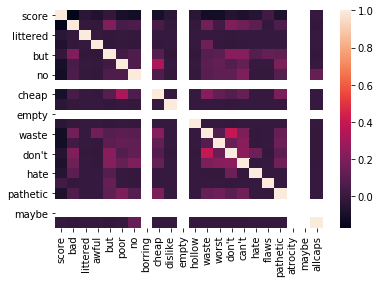

In [10]:
sns.heatmap(imdb.corr())

In [11]:
data = imdb[keywords + ['allcaps']]
target = imdb['score']

In [12]:
from sklearn.naive_bayes import BernoulliNB

In [13]:
bnb = BernoulliNB()

In [14]:
bnb.fit(data, target)
y_pred = bnb.predict(data)
print('Number of mislabelled points out of a total {} points : {}'.format(data.shape[0], (target != y_pred).sum()))
print('This translates to 61.76% accuracy.')

Number of mislabelled points out of a total 748 points : 286
This translates to 61.76% accuracy.


In [15]:
(748-286)/748


0.6176470588235294

### Amazon data set 

In [16]:
for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(' ' + str(key) + ' ', case=False)
amazon['allcaps'] = amazon.review.str.isupper()

In [17]:
data_A = amazon[keywords + ['allcaps']]
target_A = amazon['score']
bnb.fit(data_A, target_A)
y_pred_amazon = bnb.predict(data_A)

In [18]:
print('For Amazon reviews, Number of mislabelled points out of a total {} points : {}'.format(data_A.shape[0], (target_A != y_pred_amazon).sum()))

For Amazon reviews, Number of mislabelled points out of a total 1000 points : 450


In [19]:
for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(' ' + str(key) + ' ', case=False)
yelp['allcaps'] = yelp.review.str.isupper()

In [20]:
data_P = yelp[keywords + ['allcaps']]
target_P = yelp['score']
bnb.fit(data_P, target_A)
y_pred_yelp = bnb.predict(data_P)

In [21]:
print('For Yelp reviews, Number of mislabelled points out of a total {} points : {}'.format(data_P.shape[0], (target_P != y_pred_yelp).sum()))

For Yelp reviews, Number of mislabelled points out of a total 1000 points : 434


The model gives a less accurate result for Amazon and Yelp reviews (55% and 56.6% respectively) 